In [35]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

In [36]:
img_width, img_height = 150, 150

train_data_dir = r"C:/Users/kunal.bharti/Documents/OpenCV/pet_images/train"
validation_data_dir = r"C:/Users/kunal.bharti/Documents/OpenCV/pet_images/validation"
nb_train_samples = 2000
nb_validation_samples = 800
epochs = 20
batch_size = 16

In [37]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [38]:
model = tf.keras.Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2), strides=(2,2), padding='same'))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2), strides=(2,2), padding='same'))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2), strides=(2,2), padding='same'))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [39]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [40]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [41]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

C:\Users\kunal.bharti\AppData\Local\Temp\ipykernel_2608\818546861.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/20
125/125 [==============================] - 33s 254ms/step - loss: 0.7004 - accuracy: 0.5145 - val_loss: 0.6772 - val_accuracy: 0.5700
Epoch 2/20
125/125 [==============================] - 32s 254ms/step - loss: 0.6794 - accuracy: 0.5755 - val_loss: 0.6379 - val_accuracy: 0.6050
Epoch 3/20
125/125 [==============================] - 31s 246ms/step - loss: 0.6541 - accuracy: 0.6510 - val_loss: 0.6195 - val_accuracy: 0.6513
Epoch 4/20
125/125 [==============================] - 31s 244ms/step - loss: 0.6113 - accuracy: 0.6660 - val_loss: 0.5807 - val_accuracy: 0.6875
Epoch 5/20
125/125 [==============================] - 31s 247ms/step - loss: 0.5937 - accuracy: 0.6965 - val_loss: 0.6162 - val_accuracy: 0.6400
Epoch 6/20
125/125 [==============================] - 31s 249ms/step - loss: 0.5823 - accuracy: 0.6980 - val_loss: 0.5533 - val_accuracy: 0.7013
Epoch 7/20
125/125 [==============================] - 32s 256ms/step - loss: 0.5648 - accuracy: 0.7140 - val_loss: 0.5285 - val_ac

In [42]:
model.save_weights('first_try.h5')

In [43]:
# predicting images
import numpy as np
import keras
from keras.models import load_model
from keras.preprocessing import image
img = keras.utils.load_img("C:/Users/kunal.bharti/Documents/OpenCV/pet_images_uncorrupted/Dog/1402.jpg", target_size=(150, 150))
x = keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images)
print (classes)
# predict_x=model.predict(x) 
# classes_x=np.argmax(images,axis=1)
# print (predict_x)

1/1 [==============================] - 0s 91ms/step
[[1.]]


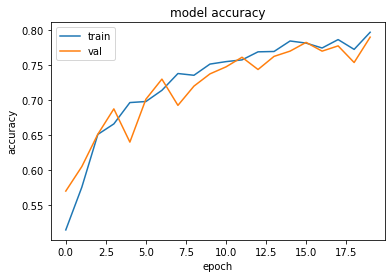

In [45]:
from matplotlib import pyplot as plt
# history = model.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

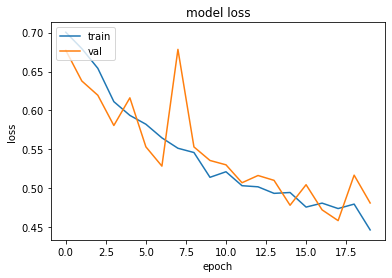

In [46]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()